In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

%load_ext autoreload
%autoreload 2

from caltech256 import Caltech256
from deep_cnn_structures import VGG_fe, train_model, test_model, each_class_accuracy, plot_loss, plot_acc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'visual': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]),
}
'''
# Replace Resize() with below in pytorch 0.2
transforms.Scale(256),
'''

data_dir = 'data/256_ObjectCategories'
#data_dir = '/datasets/Caltech256/256_ObjectCategories'

In [3]:
caltech256_train = Caltech256(data_dir, data_transforms['train'], train=True)
caltech256_test = Caltech256(data_dir, data_transforms['test'], train=False)

In [4]:
vgg_fe3 = VGG_fe(24, 28*28*256)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_fe3.fc.parameters(), lr=0.00001)

vgg_fe3 = nn.DataParallel(vgg_fe3)
vgg_fe3 = vgg_fe3.cuda()

In [5]:
vgg_fe3, record3 = train_model(vgg_fe3, caltech256_train, criterion, optimizer, num_epochs=5, batch_size=8)

0 epoch loss: 5.535209    accuracy: 0.769043%
1 epoch loss: 5.306221    accuracy: 4.858398%
2 epoch loss: 4.776764    accuracy: 20.617676%
3 epoch loss: 4.035853    accuracy: 50.976562%
4 epoch loss: 3.207435    accuracy: 75.146484%
Training comple in 19m, 31s


In [6]:
test_model(vgg_fe3, caltech256_test)

Test Set Accuracy: 19.189453%


0.19189453125

In [7]:
each_class_accuracy(vgg_fe3, caltech256_test)

Accuracy of class 0 : 12 %
Accuracy of class 1 : 12 %
Accuracy of class 2 :  0 %
Accuracy of class 3 : 25 %
Accuracy of class 4 :  0 %
Accuracy of class 5 :  0 %
Accuracy of class 6 :  0 %
Accuracy of class 7 : 25 %
Accuracy of class 8 :  0 %
Accuracy of class 9 :  0 %
Accuracy of class 10 :  0 %
Accuracy of class 11 : 62 %
Accuracy of class 12 : 62 %
Accuracy of class 13 :  0 %
Accuracy of class 14 :  0 %
Accuracy of class 15 : 62 %
Accuracy of class 16 : 25 %
Accuracy of class 17 :  0 %
Accuracy of class 18 :  0 %
Accuracy of class 19 : 50 %
Accuracy of class 20 : 87 %
Accuracy of class 21 : 12 %
Accuracy of class 22 : 12 %
Accuracy of class 23 :  0 %
Accuracy of class 24 : 12 %
Accuracy of class 25 :  0 %
Accuracy of class 26 :  0 %
Accuracy of class 27 :  0 %
Accuracy of class 28 :  0 %
Accuracy of class 29 :  0 %
Accuracy of class 30 : 12 %
Accuracy of class 31 : 25 %
Accuracy of class 32 : 25 %
Accuracy of class 33 :  0 %
Accuracy of class 34 : 62 %
Accuracy of class 35 : 37 %
Ac

In [8]:
vgg_fe4 = VGG_fe(34, 14*14*512)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_fe4.fc.parameters(), lr=0.0001)

vgg_fe4 = nn.DataParallel(vgg_fe4)
vgg_fe4 = vgg_fe4.cuda()

In [9]:
vgg_fe4, record4 = train_model(vgg_fe4, caltech256_train, criterion, optimizer, num_epochs=5, batch_size=8)

0 epoch loss: 5.231334    accuracy: 5.053711%
1 epoch loss: 3.402459    accuracy: 36.877441%
2 epoch loss: 1.649565    accuracy: 77.148438%
3 epoch loss: 0.516300    accuracy: 95.935059%
4 epoch loss: 0.098959    accuracy: 99.658203%
Training comple in 15m, 21s


In [10]:
test_model(vgg_fe4, caltech256_test)

Test Set Accuracy: 44.726562%


0.447265625

In [11]:
each_class_accuracy(vgg_fe4, caltech256_test)

Accuracy of class 0 : 12 %
Accuracy of class 1 : 37 %
Accuracy of class 2 : 75 %
Accuracy of class 3 : 50 %
Accuracy of class 4 : 12 %
Accuracy of class 5 :  0 %
Accuracy of class 6 : 25 %
Accuracy of class 7 : 50 %
Accuracy of class 8 : 25 %
Accuracy of class 9 : 50 %
Accuracy of class 10 : 50 %
Accuracy of class 11 : 62 %
Accuracy of class 12 : 37 %
Accuracy of class 13 : 37 %
Accuracy of class 14 : 87 %
Accuracy of class 15 : 50 %
Accuracy of class 16 : 37 %
Accuracy of class 17 : 25 %
Accuracy of class 18 : 12 %
Accuracy of class 19 : 100 %
Accuracy of class 20 : 100 %
Accuracy of class 21 : 100 %
Accuracy of class 22 : 37 %
Accuracy of class 23 : 50 %
Accuracy of class 24 : 37 %
Accuracy of class 25 : 37 %
Accuracy of class 26 : 62 %
Accuracy of class 27 : 25 %
Accuracy of class 28 : 12 %
Accuracy of class 29 : 12 %
Accuracy of class 30 : 50 %
Accuracy of class 31 : 62 %
Accuracy of class 32 : 37 %
Accuracy of class 33 : 75 %
Accuracy of class 34 : 62 %
Accuracy of class 35 : 62 %

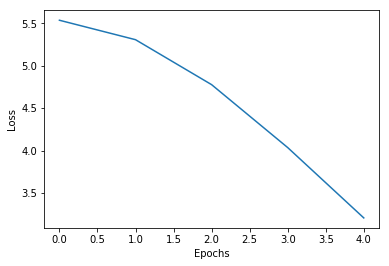

In [22]:
plot_loss(record3['loss'])

[  0.76904297   4.85839844  20.61767578  50.9765625   75.14648438]


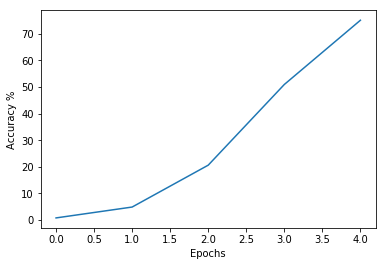

In [19]:
plot_acc(record3['acc'])

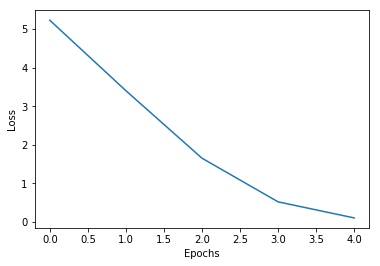

In [23]:
plot_loss(record4['loss'])

[  5.05371094  36.87744141  77.1484375   95.93505859  99.65820312]


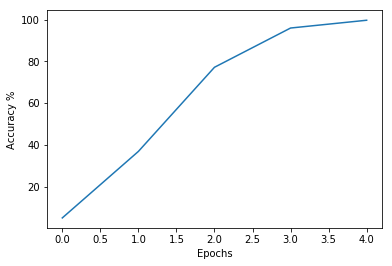

In [24]:
plot_acc(record4['acc'])